In [ ]:
!unzip captchas.zip

Archive:  captchas.zip
replace captchas/newset/c11482/0.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace captchas/newset/c11482/1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import numpy as np
from PIL import Image
import os

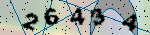

In [ ]:
img = Image.open('captchas/newset/c26434/0.png')
img

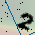

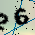

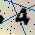

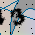

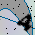

In [ ]:
img = Image.open('captchas/newset/c26434/0.png')
start = 5
end = 40
for i in range(5):
  img_crop = img.crop((start, 0, end, 35))
  img_crop.show()
  start += 25
  end += 25

In [ ]:
def convert(img):
  X = []
  numpydata = np.asarray(img)
  for n in numpydata:
    W = []
    for m in n:
      H = []
      H.append(np.mean(m))
      W.append(H)
    X.append(W)
  X = np.array(X)
  return X  

In [ ]:
X = []
y = []
for folder in os.listdir('captchas/newset'):
  for file in os.listdir('captchas/newset/'+folder+'/'):
    img = Image.open('captchas/newset/'+folder+'/'+file)
    start = 5
    end = 40
    for i in range(5):
      img_crop = img.crop((start, 0, end, 35))
      npdata = convert(img_crop)
      X.append(npdata)
      y.append(int(folder[i+1]))
      start += 25
      end += 25

In [ ]:
np.array(X).shape

(5050, 35, 35, 1)

In [ ]:
import tensorflow.keras as keras

In [ ]:
model = keras.Sequential(
        [
            keras.layers.Conv2D(filters=16, kernel_size=2, activation='relu', padding='same', input_shape=(35,35,1)),
            keras.layers.MaxPooling2D(pool_size=2),
            keras.layers.Conv2D(filters=16, kernel_size=4, activation='relu', padding='same'),
            keras.layers.MaxPooling2D(pool_size=2),
            keras.layers.Conv2D(filters=32, kernel_size=4, activation='relu', padding='same'),
            keras.layers.MaxPooling2D(pool_size=2),
            keras.layers.Flatten(),
            keras.layers.Dense(128, activation="relu"),
            keras.layers.Dense(10, activation="softmax")
        ])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

In [ ]:
from matplotlib import pyplot as plt
history = model.fit(np.array(X_train), np.array(y_train),validation_split = 0.1, validation_data=(np.array(X_test), np.array(y_test)), epochs=15, batch_size=32)

Epoch 1/15
127/127 [==============================] - 7s 42ms/step - loss: 3.1000 - accuracy: 0.1577 - val_loss: 2.1641 - val_accuracy: 0.1881
Epoch 2/15
127/127 [==============================] - 6s 48ms/step - loss: 1.6249 - accuracy: 0.4228 - val_loss: 1.2761 - val_accuracy: 0.5663
Epoch 3/15
127/127 [==============================] - 5s 37ms/step - loss: 0.7837 - accuracy: 0.7292 - val_loss: 1.2197 - val_accuracy: 0.6455
Epoch 4/15
127/127 [==============================] - 7s 52ms/step - loss: 0.3947 - accuracy: 0.8646 - val_loss: 0.6915 - val_accuracy: 0.7634
Epoch 5/15
127/127 [==============================] - 5s 41ms/step - loss: 0.2326 - accuracy: 0.9252 - val_loss: 0.3464 - val_accuracy: 0.8881
Epoch 6/15
127/127 [==============================] - 6s 50ms/step - loss: 0.1249 - accuracy: 0.9587 - val_loss: 0.2090 - val_accuracy: 0.9337
Epoch 7/15
127/127 [==============================] - 5s 42ms/step - loss: 0.0973 - accuracy: 0.9698 - val_loss: 0.5707 - val_accuracy: 0.8327

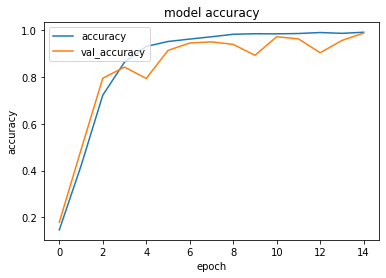

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

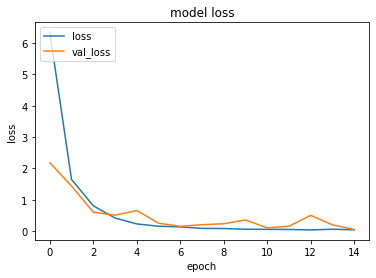

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [ ]:
_, acc = model.evaluate(np.array(X_test), np.array(y_test))
print('> %.3f' % (acc * 100.0))

32/32 [==============================] - 1s 20ms/step - loss: 0.0856 - accuracy: 0.9752
> 97.525


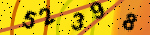

1/1 [==============================] - 0s 27ms/step


[5, 2, 3, 9, 8]

In [ ]:
# testing model

# img = Image.open('captchas/newset/c67622/0.png')
img = Image.open('test.png')
img.show()
start = 5
end = 40
nums = []
for i in range(5):
  img_crop = img.crop((start, 0, end, 35))
  npdata = convert(img_crop)
  test = []
  test.append(npdata) 
  pred = model.predict(np.array(test))
  nums.append(np.argmax(pred))
  start += 25
  end += 25
nums

In [ ]:
model.save('captcha_recognizer_model.h5')

In [ ]:
!zip -r captcha_model.zip captcha_recognizer_model

  adding: captcha_recognizer_model/ (stored 0%)
  adding: captcha_recognizer_model/assets/ (stored 0%)
  adding: captcha_recognizer_model/saved_model.pb (deflated 89%)
  adding: captcha_recognizer_model/variables/ (stored 0%)
  adding: captcha_recognizer_model/variables/variables.index (deflated 60%)
  adding: captcha_recognizer_model/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: captcha_recognizer_model/keras_metadata.pb (deflated 92%)
  adding: captcha_recognizer_model/fingerprint.pb (stored 0%)
